To copy this template: File -> Save a Copy in Drive

***DISCLAIMER**: In case of any discrepancy in the assignment instruction, please refer to the `PDF` document.*

# Problem 2 - Precision, Recall, ROC

## 2.1

**Answer:**

## 2.2

**Link to dataset:**
https://www.openml.org/search?type=data&status=active&sort=runs&qualities.NumberOfClasses=%3D_2&id=37

In [75]:
# your code starts here
# your code starts here
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

dataset = fetch_openml(data_id=37, parser='auto')


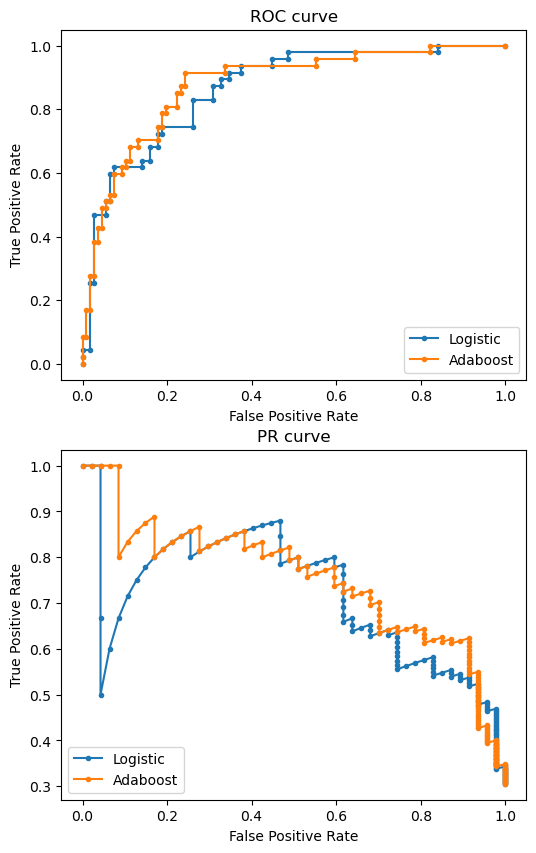

In [76]:
# Store the feature data
X = dataset.data
# store the target data
y = pd.get_dummies(dataset.target, drop_first=True, dtype=int).iloc[:, 0]
# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle= True)

from sklearn.linear_model import LogisticRegression

# Instantiate a logistic regression model, set the max_iter to 3000
logreg = LogisticRegression(max_iter=3000)
# fit the logreg instance to the dataset
logreg.fit(X_train, y_train)
logreg_test_probs = logreg.predict_proba(X_test)[:,1]

from sklearn.ensemble import AdaBoostClassifier

adab = AdaBoostClassifier(n_estimators=100, random_state=0)
adab.fit(X_train, y_train)
adab_test_probs = adab.predict_proba(X_test)[:,1]

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(6, 10))

from sklearn.metrics import roc_curve, precision_recall_curve

plt.sca(axs[0])

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, logreg_test_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, adab_test_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Adaboost')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.title('ROC curve')

plt.sca(axs[1])

precision, recall, thresholds = precision_recall_curve(y_test, logreg_test_probs)
plt.plot(recall, precision, marker='.', label='Logistic')

precision, recall, thresholds = precision_recall_curve(y_test, adab_test_probs)
plt.plot(recall, precision, marker='.', label='Adaboost')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower left')
plt.title('PR curve')

plt.show()


**Answer:**